In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from textblob import TextBlob

from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from tqdm import tqdm


In [2]:
data1 = pd.read_csv("Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\Stocks News Articles Datasets\Headlines_2015.csv")
data2 = pd.read_csv("Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\Stocks News Articles Datasets\Headlines_2016.csv")
data3 = pd.read_csv("Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\Stocks News Articles Datasets\Headlines_2017.csv")
data4 = pd.read_csv("Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\Stocks News Articles Datasets\Headlines_2018.csv")
data5 = pd.read_csv("Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\Stocks News Articles Datasets\Headlines_2019.csv")
data6 = pd.read_csv("Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\Stocks News Articles Datasets\Headlines_2020.csv")
data7 = pd.read_csv("Datasets of Stocks Market and Stock News Articles\Datasets of Stocks Market and Stock News Articles\Stocks News Articles Datasets\Headlines_2021.csv")

df = pd.concat([data1, data2, data3, data4, data5, data6, data7])
print(len(data1), len(data2), len(data3),len(data4), len(data5), len(data6),len(data7))
print("Total Rows in dataframe:", len(df))

365 366 365 365 364 366 174
Total Rows in dataframe: 2365


In [3]:
df.head()


,Date,Headlines
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
1,2015-01-02,What to expect from Apple in 2015 beyond its s...
2,2015-01-03,Mountie: An inexpensive and innovative way to ...
3,2015-01-04,"Donald Yacktman on the Sources of Moats, His C..."
4,2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."


In [4]:
df = df.drop_duplicates()

df['Date'] = pd.to_datetime(df['Date'])

In [5]:
print(df.describe())
print("="*50)
df.info()
print("="*50)
print(df.shape)
print("="*50)
print(df.isnull().sum())
print("="*50)

                       Date                                          Headlines
count                  2342                                               2342
unique                 2335                                               2332
top     2019-11-20 00:00:00  MasterCard is expanding its mobile wallet in S...
freq                      2                                                  3
first   2015-01-01 00:00:00                                                NaN
last    2021-06-23 00:00:00                                                NaN
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 173
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2342 non-null   datetime64[ns]
 1   Headlines  2342 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 54.9+ KB
(2342, 2)
Date         0
Headlines    0
dtype: int64


C:\Users\TIRTHA~1\AppData\Local\Temp/ipykernel_17752/3972082628.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe())


In [6]:
# printing some random reviews
sent_0 = df['Headlines'].values[0]
print(sent_0)
print("="*50)

sent_1000 = df['Headlines'].values[1000]
print(sent_1000)
print("="*50)

sent_1500 = df['Headlines'].values[1500]
print(sent_1500)
print("="*50)

sent_2000 = df['Headlines'].values[2000]
print(sent_2000)
print("="*50)

What Can We Expect From Apple Inc. In 2015? 1 Reason I Might Be Wrong About the Apple Inc. Retina MacBook Air More Evidence Apple Inc.&quot;s First Quarter Will Be Huge Samsung: New smart TVs in 2015 to run on Tizen OS
Should You Buy Applied Materials (AMAT) Stock As It Hits New High? Time To Take A Bite Out Of Apple? Amazon.com Unveils New Echo Products: What You Need to Know UPDATE 1-Microsoft search engine Bing to focus on PC search market -CEO Apple working on fix for iPhone 8 &quot;crackling&quot; sound issue     - CNET Microsoft search engine Bing to focus on PC search market -CEO Wall Street ends flat after Yellen, tech shares bounce (VIDEO) Apple just released new information about how facial recognition on the iPhone X works Microsoft search engine Bing to focus on PC search market: CEO Microsoft search engine Bing to focus on PC search market: CEO Amazon&quot;s New Alexa Gadgets Are Aiming For Every Nook And Cranny Of Your Life Shareholders Accuse Google and Alphabet of Withh

### Sentiment scores

In [7]:
#Create a function to get subjectivity

def getSubjectivity(df):
    return TextBlob(df).sentiment.subjectivity

#create a function to get the polarity

def getPolarity(df):
    return TextBlob(df).sentiment.polarity

#create two new solumns called "Subjectivity" & "Polarity"

df['Subjectivity'] = df['Headlines'].apply(getSubjectivity)
df['Polarity'] = df['Headlines'].apply(getPolarity)

#show the data"
df.head()

,Date,Headlines,Subjectivity,Polarity
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...,0.621789,0.166775
1,2015-01-02,What to expect from Apple in 2015 beyond its s...,0.539970,0.144614
2,2015-01-03,Mountie: An inexpensive and innovative way to ...,0.593317,0.202787
3,2015-01-04,"Donald Yacktman on the Sources of Moats, His C...",0.504270,0.150826
4,2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",0.442675,0.144078


In [8]:
#create a function o get the text sentiment

def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'Positve'

In [9]:
#create a column to store the text sentiments

df['Sentiment'] = df['Polarity'].apply(getSentiment)

#show the data
df.head()

,Date,Headlines,Subjectivity,Polarity,Sentiment
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...,0.621789,0.166775,Positve
1,2015-01-02,What to expect from Apple in 2015 beyond its s...,0.539970,0.144614,Positve
2,2015-01-03,Mountie: An inexpensive and innovative way to ...,0.593317,0.202787,Positve
3,2015-01-04,"Donald Yacktman on the Sources of Moats, His C...",0.504270,0.150826,Positve
4,2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",0.442675,0.144078,Positve


In [10]:
df.Sentiment.value_counts()

Positve     2181
Negative     131
neutral       30
Name: Sentiment, dtype: int64

<AxesSubplot:title={'center':'Sentiment Analysis'}, xlabel='Sentiment', ylabel='Counts'>

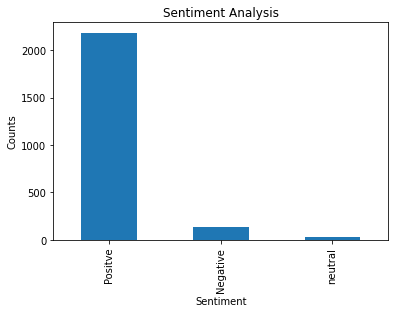

In [11]:
df['Sentiment'].value_counts()

#plot & visualize the counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Sentiment'].value_counts().plot(kind='bar')

In [12]:
enc = LabelEncoder()
df['Sentiment'] = enc.fit_transform(df['Sentiment'])
df.head()

,Date,Headlines,Subjectivity,Polarity,Sentiment
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...,0.621789,0.166775,1
1,2015-01-02,What to expect from Apple in 2015 beyond its s...,0.539970,0.144614,1
2,2015-01-03,Mountie: An inexpensive and innovative way to ...,0.593317,0.202787,1
3,2015-01-04,"Donald Yacktman on the Sources of Moats, His C...",0.504270,0.150826,1
4,2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",0.442675,0.144078,1


In [13]:
sent_0 = re.sub(r"http\S+", "", sent_0)
sent_1000 = re.sub(r"http\S+", "", sent_1000)
sent_1500 = re.sub(r"http\S+", "", sent_1500)
sent_2000 = re.sub(r"http\S+", "", sent_2000)

print(sent_0)



What Can We Expect From Apple Inc. In 2015? 1 Reason I Might Be Wrong About the Apple Inc. Retina MacBook Air More Evidence Apple Inc.&quot;s First Quarter Will Be Huge Samsung: New smart TVs in 2015 to run on Tizen OS


In [14]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(sent_0, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_1000, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_1500, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_2000, 'lxml')
text = soup.get_text()
print(text)


What Can We Expect From Apple Inc. In 2015? 1 Reason I Might Be Wrong About the Apple Inc. Retina MacBook Air More Evidence Apple Inc."s First Quarter Will Be Huge Samsung: New smart TVs in 2015 to run on Tizen OS
Should You Buy Applied Materials (AMAT) Stock As It Hits New High? Time To Take A Bite Out Of Apple? Amazon.com Unveils New Echo Products: What You Need to Know UPDATE 1-Microsoft search engine Bing to focus on PC search market -CEO Apple working on fix for iPhone 8 "crackling" sound issue     - CNET Microsoft search engine Bing to focus on PC search market -CEO Wall Street ends flat after Yellen, tech shares bounce (VIDEO) Apple just released new information about how facial recognition on the iPhone X works Microsoft search engine Bing to focus on PC search market: CEO Microsoft search engine Bing to focus on PC search market: CEO Amazon"s New Alexa Gadgets Are Aiming For Every Nook And Cranny Of Your Life Shareholders Accuse Google and Alphabet of Withholding Gender Pay Ga

In [15]:

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [16]:
sent_1500 = decontracted(sent_1500)
print(sent_1500)
print("="*50)

Prepare For The Prescription Drug Price Battle Amazon&apos;s Bezos & Twitter winners of week; Apple Store, InstaCart losers Apple: Don&quot;t Stop Believin&quot; Apple Inc. (AAPL) Position Cut by Sterling Investment Management Inc. Mycio Wealth Partners LLC Sells 6,122 Shares of Apple Inc. (AAPL) Apple Inc. (AAPL) Shares Bought by CFO4Life Group LLC Apple fixes FaceTime bug, new iOS 12.1.4 update available; big bounty for teenager founding bug


In [17]:
sent_0 = re.sub("\S*\d\S*", "", sent_0).strip()
print(sent_0)

What Can We Expect From Apple Inc. In   Reason I Might Be Wrong About the Apple Inc. Retina MacBook Air More Evidence Apple Inc.&quot;s First Quarter Will Be Huge Samsung: New smart TVs in  to run on Tizen OS


In [18]:
sent_1500 = re.sub('[^A-Za-z0-9]+', ' ', sent_1500)
print(sent_1500)

Prepare For The Prescription Drug Price Battle Amazon apos s Bezos Twitter winners of week Apple Store InstaCart losers Apple Don quot t Stop Believin quot Apple Inc AAPL Position Cut by Sterling Investment Management Inc Mycio Wealth Partners LLC Sells 6 122 Shares of Apple Inc AAPL Apple Inc AAPL Shares Bought by CFO4Life Group LLC Apple fixes FaceTime bug new iOS 12 1 4 update available big bounty for teenager founding bug


In [19]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [20]:
from nltk.corpus import stopwords
ps = PorterStemmer()

preprocessed_headlines = []
# tqdm is for printing the status bar
for sentance in tqdm(df['Headlines'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = sentance.lower()
    sentance = [ps.stem(token) for token in nltk.word_tokenize(sentance) if not token in stopwords.words('english')]
    sentance = ' '.join(sentance)
    preprocessed_headlines.append(sentance.strip())

100%|██████████████████████████████████████████████████████████████████████████████| 2342/2342 [04:41<00:00,  8.31it/s]


In [21]:
#df['Headlines'].values
df['Headlines'].values[1500]
print("=="*50)
preprocessed_headlines[1500]

'prepar prescript drug price battl amazon bezo twitter winner week appl store instacart loser appl stop believin appl inc aapl posit cut sterl invest manag inc mycio wealth partner llc sell share appl inc aapl appl inc aapl share bought group llc appl fix facetim bug new io updat avail big bounti teenag found bug'

In [22]:
df['preprocessed_headlines']=pd.DataFrame(preprocessed_headlines)


In [23]:
df.head(5)

,Date,Headlines,Subjectivity,Polarity,Sentiment,preprocessed_headlines
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...,0.621789,0.166775,1,expect appl inc reason might wrong appl inc re...
1,2015-01-02,What to expect from Apple in 2015 beyond its s...,0.539970,0.144614,1,expect appl beyond smartwatch amazon latest ki...
2,2015-01-03,Mountie: An inexpensive and innovative way to ...,0.593317,0.202787,1,mounti inexpens innov way attach iphon ipad ma...
3,2015-01-04,"Donald Yacktman on the Sources of Moats, His C...",0.504270,0.150826,1,donald yacktman sourc moat concern appl strate...
4,2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",0.442675,0.144078,1,sim free iphon plu reportedli debut tomorrow l...


In [24]:
x = df[['Headlines','Subjectivity','Polarity']]
y =df['Sentiment']

In [25]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(preprocessed_headlines)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

final_counts = count_vect.transform(preprocessed_headlines)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['aa', 'aaa', 'aaar', 'aaba', 'aac', 'aafmaa', 'aal', 'aaoi', 'aap', 'aapl']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (2342, 22563)
the number of unique words  22563


In [26]:
#tfidf
tf_idf_vect = TfidfVectorizer(max_features=5000,ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(preprocessed_headlines)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(preprocessed_headlines)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])
X=tf_idf_vect.fit_transform(preprocessed_headlines).toarray()

some sample features(unique words in the corpus) ['aa', 'aapl', 'aapl acquir', 'aapl amazon', 'aapl amzn', 'aapl appl', 'aapl buy', 'aapl earn', 'aapl expect', 'aapl facebook']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (2342, 5000)
the number of unique words including both unigrams and bigrams  5000


In [27]:
tf_idf_vect.get_feature_names()[:20]

['aa',
 'aapl',
 'aapl acquir',
 'aapl amazon',
 'aapl amzn',
 'aapl appl',
 'aapl buy',
 'aapl earn',
 'aapl expect',
 'aapl facebook',
 'aapl fb',
 'aapl first',
 'aapl get',
 'aapl given',
 'aapl goog',
 'aapl googl',
 'aapl hold',
 'aapl ibm',
 'aapl iphon',
 'aapl microsoft']

In [28]:
tf_idf_vect.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 10,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [29]:
X.shape,y.shape

((2342, 5000), (2342,))

In [30]:
#https://www.kaggle.com/cnokello/news-article-classification-using-naive-bayes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.3,
    random_state = 5
)

print("Training dataset: ", X_train.shape[0])
print("Test dataset: ", X_test.shape[0])

Training dataset:  1639
Test dataset:  703


In [31]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()


### Predictions with TFIDF 

In [32]:
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)


In [33]:
from sklearn import metrics
metrics.accuracy_score(y_test, predictions)

0.9359886201991465

In [34]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score: ", accuracy_score(y_test, predictions))
print("Recall score: ", recall_score(y_test, predictions, average = 'weighted'))
print("Precision score: ", precision_score(y_test, predictions, average = 'weighted'))
print("F1 score: ", f1_score(y_test, predictions, average = 'weighted'))

Accuracy score:  0.9359886201991465
Recall score:  0.9359886201991465
Precision score:  0.8760746971423022
F1 score:  0.9050411639838918


c:\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
import pickle

pickle.dump(nb, open('nb.pkl', 'wb'))

### Predictions with count vectorization

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    df['Sentiment'],
    df['preprocessed_headlines'], 
    random_state = 5
)

print("Training dataset: ", X_train.shape[0])
print("Test dataset: ", X_test.shape[0])

Training dataset:  1773
Test dataset:  592


In [57]:
"""#CountVectorizer is taking lists (with string contents)
#as an argument rather than array. 
count_vector = CountVectorizer(stop_words = 'english')
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)"""

"#CountVectorizer is taking lists (with string contents)\n#as an argument rather than array. \ncount_vector = CountVectorizer(stop_words = 'english')\ntraining_data = count_vector.fit_transform(X_train)\ntesting_data = count_vector.transform(X_test)"